In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,BatchNormalization,Activation,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from PIL import Image

In [31]:
# Importing data

train_df = pd.read_csv('../input/gtsrb-german-traffic-sign/Train.csv')
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [32]:
# Checking Null values

train_df.isnull().sum()

Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64

In [33]:
# Finding No. of output categories

len(train_df['ClassId'].value_counts())

43

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


<AxesSubplot:xlabel='ClassId', ylabel='count'>

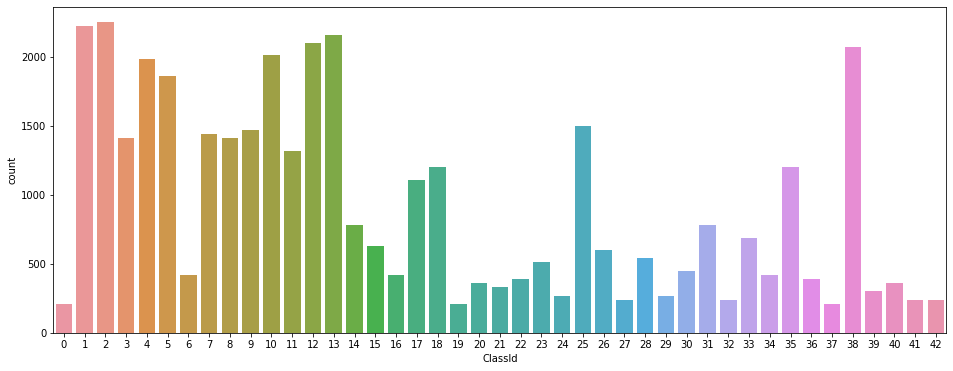

In [35]:
plt.figure(figsize=(16,6))
sns.countplot(x=train_df['ClassId'])

In [36]:
# Finding non-image file on path feature

a=[i for i in train_df['Path'] if not i.endswith('.png')]
a

[]

### -->What is the use of Conv2D?
#### Mandatory Conv2D parameter is the numbers of filters that convolutional layers will learn from. It is an integer value and also determines the number of output filters in the convolution. Here we are learning a total of 32 filters and then we use Max Pooling to reduce the spatial dimensions of the output volume.

### --->How does batch normalization work?
#### Batch normalisation normalises a layer input by subtracting the mini-batch mean and dividing it by the mini-batch standard deviation.

### --->Max pooling?
#### Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map.

### --->Dropout?
#### Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

### --->Flatten?
#### Flattening is converting the data into a 1-dimensional array for inputting it to the next layer.

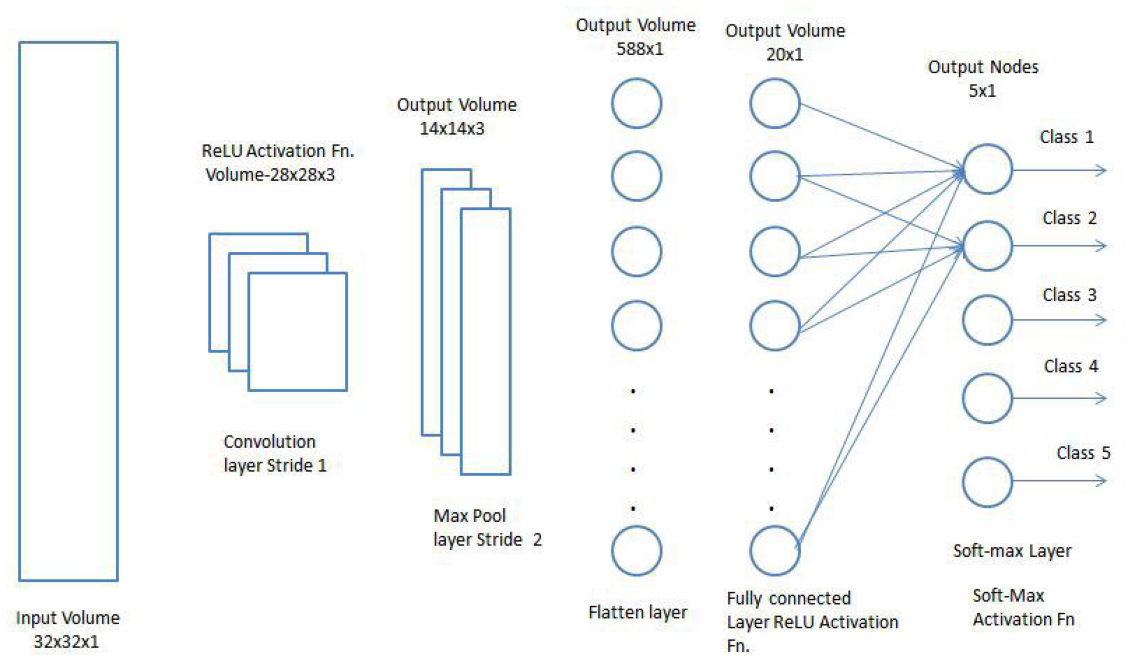

In [84]:
plt.figure(figsize=(22,12))
im=Image.open('../input/cnn-img/cnn.jpg')
plt.axis('off')
plt.imshow(im)

In [37]:
# Creating Model 

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(43,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 118, 118, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 118, 118, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 57, 57, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 28, 64)       

### --->Callback API?
#### A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc).

In [39]:
# Creating callbacks 
(e.g. at the start or end of an epoch, before or after a single batch, etc).

early_stopping=EarlyStopping(monitor='val_accuracy',patience=5)
reduce_lr=ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,patience=5,verbose=1,min_lr=0.0001,)
callback=[early_stopping,reduce_lr]

In [41]:
# Converting class id to string

train_df['ClassId']=train_df['ClassId'].astype(str)

In [42]:
train_df=train_df[['ClassId','Path']]
train_df.head()

,ClassId,Path
0,20,Train/20/00020_00000_00000.png
1,20,Train/20/00020_00000_00001.png
2,20,Train/20/00020_00000_00002.png
3,20,Train/20/00020_00000_00003.png
4,20,Train/20/00020_00000_00004.png


In [43]:
# Train_test_split

train_data,validation_data=train_test_split(train_df,test_size=0.2,random_state=10)

In [44]:
train_data.shape, validation_data.shape

((31367, 2), (7842, 2))

In [45]:
# Reseting split data index

train_data=train_data.reset_index(drop=True)
validation_data=validation_data.reset_index(drop=True)

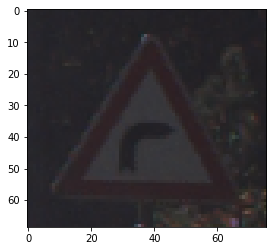

In [87]:
img = Image.open('../input/gtsrb-german-traffic-sign/' + train_df['Path'][24])
plt.imshow(img)

### --->Data Augmentation
#### Techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model.

In [47]:
# Training data augmentation

train_gen=ImageDataGenerator(rotation_range=15,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             rescale=1./255,
                             horizontal_flip=True)

train_generator=train_gen.flow_from_dataframe(train_data,
                                              '../input/gtsrb-german-traffic-sign',
                                              x_col='Path',
                                              y_col='ClassId',
                                              
                                              target_size=(120,120),
                                              batch_size=30,
                                              class_mode='categorical')

Found 31367 validated image filenames belonging to 43 classes.


In [48]:
# Validating data augmentation

validation_gen=ImageDataGenerator(rescale=1./255)

validation_generator=validation_gen.flow_from_dataframe(validation_data,
                                              '../input/gtsrb-german-traffic-sign',
                                              x_col='Path',
                                              y_col='ClassId',
                                              target_size=(120,120),
                                              batch_size=30,
                                              class_mode='categorical')

Found 7842 validated image filenames belonging to 43 classes.


In [50]:
# Executing the model

history=model.fit_generator(train_generator,
                            steps_per_epoch=31367//30,
                            epochs=30,
                            verbose=1,
                            callbacks=callback,
                            validation_data=validation_generator,
                            validation_steps=7842//30)

Epoch 1/30
1045/1045 [==============================] - 160s 153ms/step - loss: 1.7661 - accuracy: 0.4816 - val_loss: 1.1584 - val_accuracy: 0.6280
Epoch 2/30
1045/1045 [==============================] - 151s 144ms/step - loss: 0.8731 - accuracy: 0.7179 - val_loss: 0.4418 - val_accuracy: 0.8576
Epoch 3/30
1045/1045 [==============================] - 149s 143ms/step - loss: 0.5996 - accuracy: 0.8071 - val_loss: 0.4966 - val_accuracy: 0.8350
Epoch 4/30
1045/1045 [==============================] - 149s 142ms/step - loss: 0.4700 - accuracy: 0.8477 - val_loss: 0.3563 - val_accuracy: 0.8838
Epoch 5/30
1045/1045 [==============================] - 154s 148ms/step - loss: 0.3981 - accuracy: 0.8715 - val_loss: 0.2770 - val_accuracy: 0.9188
Epoch 6/30
1045/1045 [==============================] - 156s 149ms/step - loss: 0.3527 - accuracy: 0.8875 - val_loss: 0.2276 - val_accuracy: 0.9264
Epoch 7/30
1045/1045 [==============================] - 151s 145ms/step - loss: 0.3166 - accuracy: 0.8988 - val_

In [51]:
# Reading the test data

test_df=pd.read_csv('../input/gtsrb-german-traffic-sign/Test.csv',usecols=['Path','ClassId'])
test_df.head()

,ClassId,Path
0,16,Test/00000.png
1,1,Test/00001.png
2,38,Test/00002.png
3,33,Test/00003.png
4,11,Test/00004.png


In [52]:
# Checking null values

test_df.isnull().sum()

ClassId    0
Path       0
dtype: int64

In [53]:
# Finding the non-image file

b=[i for i in test_df['Path'] if not i.endswith('.png')]
b

[]

In [54]:
# Test data augmentation

test_gen=ImageDataGenerator(rescale=1./255)

test_generator=test_gen.flow_from_dataframe(test_df,
                                            '../input/gtsrb-german-traffic-sign',
                                            x_col='Path',
                                              y_col=None,
                                              target_size=(120,120),
                                              batch_size=15,
                                              class_mode=None)

Found 12630 validated image filenames.


In [55]:
# Predicting the Images

predict=model.predict_classes(test_generator)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [58]:
from sklearn.metrics import confusion_matrix,classification_report

In [60]:
print(classification_report(test_df['ClassId'],test_df['Predict']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.06      0.06      0.06       720
           2       0.07      0.06      0.06       750
           3       0.05      0.05      0.05       450
           4       0.06      0.05      0.05       660
           5       0.05      0.06      0.05       630
           6       0.01      0.03      0.02       150
           7       0.06      0.03      0.04       450
           8       0.02      0.01      0.01       450
           9       0.03      0.02      0.03       480
          10       0.04      0.02      0.03       660
          11       0.03      0.01      0.01       420
          12       0.06      0.07      0.06       690
          13       0.07      0.01      0.02       720
          14       0.00      0.00      0.00       270
          15       0.01      0.00      0.01       210
          16       0.01      0.02      0.02       150
          17       0.01    

In [61]:
confusion_matrix(test_df['ClassId'],test_df['Predict'])

array([[ 0,  2,  7, ...,  5,  0,  2],
       [ 0, 46, 34, ..., 30, 31, 31],
       [ 1, 40, 43, ..., 27, 27, 36],
       ...,
       [ 0,  7,  7, ...,  1,  4,  2],
       [ 0,  3,  2, ...,  5,  3,  5],
       [ 0,  6,  6, ...,  2,  7,  3]])

In [66]:
# Finding index of correct prediction

test_df['Predict']=predict
a=np.where(test_df['ClassId']==test_df['Predict'])
a

(array([   10,    59,   117,   193,   213,   292,   307,   329,   335,
          386,   390,   394,   412,   424,   455,   512,   623,   641,
          677,   698,   718,   733,   822,   858,   887,   903,   945,
          955,  1126,  1129,  1156,  1173,  1174,  1200,  1273,  1287,
         1294,  1358,  1363,  1404,  1485,  1492,  1495,  1499,  1510,
         1529,  1565,  1571,  1582,  1664,  1668,  1688,  1738,  1842,
         1843,  1844,  1882,  1928,  1929,  1942,  1955,  1969,  1977,
         2114,  2295,  2301,  2312,  2323,  2328,  2366,  2404,  2452,
         2497,  2557,  2568,  2574,  2579,  2620,  2736,  2738,  2747,
         2757,  2816,  2861,  2932,  2997,  3071,  3074,  3142,  3156,
         3181,  3182,  3199,  3200,  3231,  3264,  3282,  3284,  3364,
         3404,  3408,  3460,  3483,  3542,  3599,  3612,  3619,  3621,
         3685,  3726,  3748,  3826,  3839,  3903,  3924,  3942,  3959,
         3985,  4018,  4059,  4073,  4076,  4116,  4156,  4161,  4179,
      

In [75]:
correct_pred=test_df.loc[[10,59,117,193,213,292,307,329,335],]
correct_pred

,ClassId,Path,Predict
10,12,Test/00010.png,12
59,16,Test/00059.png,16
117,29,Test/00117.png,29
193,38,Test/00193.png,38
213,5,Test/00213.png,5
292,13,Test/00292.png,13
307,1,Test/00307.png,1
329,2,Test/00329.png,2
335,6,Test/00335.png,6


In [74]:
correct_pred=correct_pred.reset_index(drop=True)
correct_pred.head()

,ClassId,Path,Predict
0,12,Test/00010.png,12
1,16,Test/00059.png,16
2,29,Test/00117.png,29
3,38,Test/00193.png,38
4,5,Test/00213.png,5


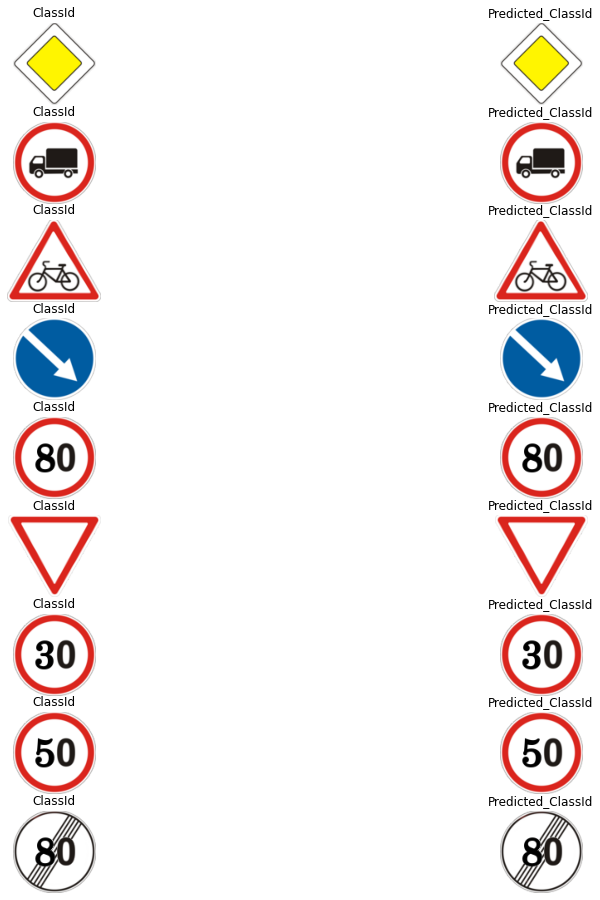

In [89]:
# Visualizing only for correct prediction

plt.figure(figsize=(16,16))
plt.tight_layout()
class_id=correct_pred['ClassId']
pred=correct_pred['Predict']
for i,j in enumerate(class_id):
    img=Image.open('../input/gtsrb-german-traffic-sign/Meta/'+str(j)+'.png')
    plt.subplot(9,2,2*i+1)
    plt.axis('off')
    plt.title('ClassId')
    plt.imshow(img)
for i,j in enumerate(pred):
    img=Image.open('../input/gtsrb-german-traffic-sign/Meta/'+str(j)+'.png')
    plt.subplot(9,2,2*i+2)
    plt.axis('off')
    plt.title('Predicted_ClassId')
    plt.imshow(img)       

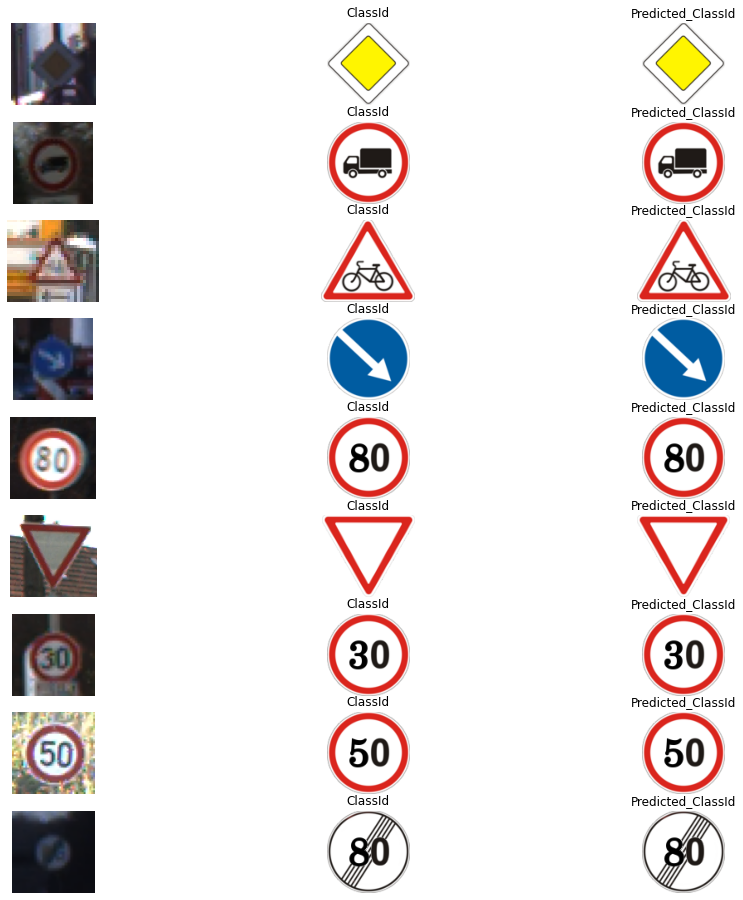

In [121]:
# Visualizing only for correct prediction with test data

plt.figure(figsize=(16,16))
#plt.tight_layout()
class_id=correct_pred['ClassId']
pred=correct_pred['Predict']

for i,j in enumerate(correct_pred['Path']):
    img=Image.open('../input/gtsrb-german-traffic-sign/'+j)
    plt.subplot(9,3,3*i+1)
    plt.axis('off')
    plt.imshow(img)
    
for i,j in enumerate(class_id):
    img=Image.open('../input/gtsrb-german-traffic-sign/Meta/'+str(j)+'.png')
    plt.subplot(9,3,3*i+2)
    plt.axis('off')
    plt.title('ClassId')
    plt.imshow(img)

for i,j in enumerate(pred):
    img=Image.open('../input/gtsrb-german-traffic-sign/Meta/'+str(j)+'.png')
    plt.subplot(9,3,3*i+3)
    plt.axis('off')
    plt.title('Predicted_ClassId')
    plt.imshow(img) 